In [1]:
import numpy as np
import datetime as dt
import xarray
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pandas as pd

# download some direct monthly radiation data from cosmo rea6g2

In [ ]:
# !wget https://opendata.dwd.de/climate_environment/REA/COSMO_R6G2/monthly/mon_rsdsdir/rsdsdir_EUR-6km_ECMWF-ERA5_R6G2_r1i1p1f1_COSMOv5_v1_mon_202201-202212.nc

# read the downloaded data

In [2]:
ifile = 'rsdsdir_EUR-6km_ECMWF-ERA5_R6G2_r1i1p1f1_COSMOv5_v1_mon_202201-202212.nc'
ds = xarray.open_dataset(ifile)
ds

<xarray.Dataset> Size: 89MB
Dimensions:                     (time: 12, bnds: 2, rlat: 824, rlon: 848,
                                 vertices: 4)
Coordinates:
  * time                        (time) datetime64[ns] 96B 2022-01-16T12:00:00...
  * rlat                        (rlat) float64 7kB -23.4 -23.35 ... 21.81 21.86
  * rlon                        (rlon) float64 7kB -28.4 -28.35 ... 18.13 18.18
    latitude                    (rlat, rlon) float64 6MB ...
    longitude                   (rlat, rlon) float64 6MB ...
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds                   (time, bnds) datetime64[ns] 192B ...
    rlat_bnds                   (rlat, bnds) float64 13kB ...
    rlon_bnds                   (rlon, bnds) float64 14kB ...
    rotated_latitude_longitude  int32 4B ...
    vertices_latitude           (rlat, rlon, vertices) float64 22MB ...
    vertices_longitude          (rlat, rlon, vertices) float64 22MB ...
    rsdsdir                     (time, rlat, rlon) float32 34MB ...
Attributes: (12/44)
    CDO:                            Climate Data Operators version 2.2.0 (htt...
    CORDEX_domain:                  EUR-6km
    Conventions:                    CF-1.7
    activity_id:                    COSMO-REA
    contact:                        cdc.rea@dwd.de
    creation_date:                  2024-12-14T06:24:56Z
    ...                             ...
    tracking_id:                    fe3ead3e-3b8f-4ee1-9e48-969a32c6e97d
    variable_id:                    rsdsdir
    variant_info:                   Regional reanalysis forced by ERA5.
    variant_label:                  r1i1p1f1
    license:                        COSMO-REA model data produced by DWD is l...
    cmor_version:                   3.7.2

# plotting via xarray backend

## quickplot of data: histogram

(array([2018718., 1204374., 1228142., 1099273.,  847024.,  629856.,
         588808.,  586326.,  178156.,    4347.]),
 array([  0.        ,  25.90948868,  51.81897736,  77.72846985,
        103.63795471, 129.54743958, 155.4569397 , 181.36642456,
        207.27590942, 233.18539429, 259.09487915]),
 <BarContainer object of 10 artists>)

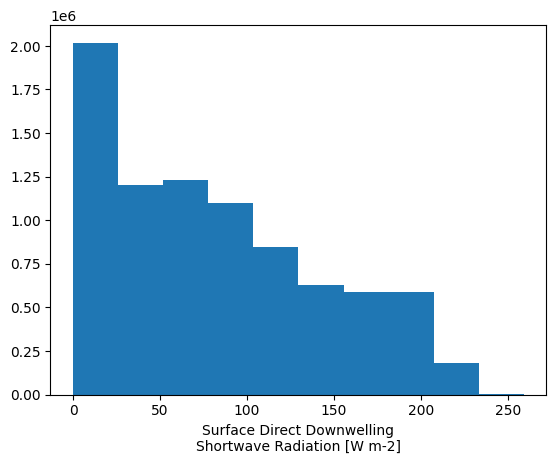

In [3]:
ds['rsdsdir'].plot()

## plot one timestep on map

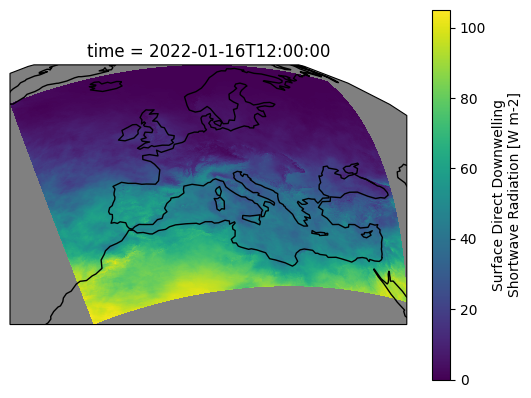

In [4]:
ds['rsdsdir'].isel(time=0).plot.pcolormesh(y='latitude', x='longitude',
       subplot_kws=dict(projection=ccrs.Orthographic(), facecolor="gray"),transform=ccrs.PlateCarree())
plt.gca().coastlines();

## plot several timesteps using FacetGrid plotting

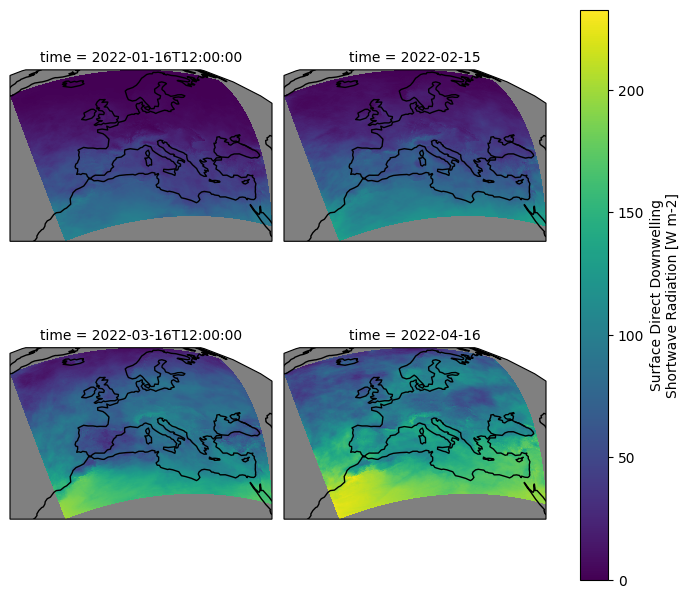

In [5]:
p=ds['rsdsdir'].isel(time=np.arange(4)).plot.pcolormesh(y='latitude', x='longitude', col='time',col_wrap=2,
       subplot_kws=dict(projection=ccrs.Orthographic(), facecolor="gray"),transform=ccrs.PlateCarree())
for ax in p.axs.flat:
    ax.coastlines();

## optimize plotting by creating month as coordinate & dimension

In [6]:
pdtime = pd.to_datetime(ds['rsdsdir'].time)
ds['month'] = xarray.DataArray(data=pdtime.strftime('%b') + ' 2022', coords={'time':(ds.time.dims,ds.time.values)})
ds = ds.assign_coords(dict(**ds.coords,month=ds.month) )
ds.month

<xarray.DataArray 'month' (time: 12)> Size: 96B
array(['Jan 2022', 'Feb 2022', 'Mar 2022', 'Apr 2022', 'May 2022', 'Jun 2022',
       'Jul 2022', 'Aug 2022', 'Sep 2022', 'Oct 2022', 'Nov 2022', 'Dec 2022'],
      dtype=object)
Coordinates:
    month    (time) object 96B 'Jan 2022' 'Feb 2022' ... 'Nov 2022' 'Dec 2022'
  * time     (time) datetime64[ns] 96B 2022-01-16T12:00:00 ... 2022-12-16T12:...

In [7]:
ds = ds.swap_dims(time='month')
ds

<xarray.Dataset> Size: 89MB
Dimensions:                     (month: 12, bnds: 2, rlat: 824, rlon: 848,
                                 vertices: 4)
Coordinates:
    latitude                    (rlat, rlon) float64 6MB 21.95 21.97 ... 66.7
    longitude                   (rlat, rlon) float64 6MB -10.08 -10.03 ... 65.06
  * month                       (month) object 96B 'Jan 2022' ... 'Dec 2022'
  * rlat                        (rlat) float64 7kB -23.4 -23.35 ... 21.81 21.86
  * rlon                        (rlon) float64 7kB -28.4 -28.35 ... 18.13 18.18
    time                        (month) datetime64[ns] 96B 2022-01-16T12:00:0...
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds                   (month, bnds) datetime64[ns] 192B ...
    rlat_bnds                   (rlat, bnds) float64 13kB ...
    rlon_bnds                   (rlon, bnds) float64 14kB ...
    rotated_latitude_longitude  int32 4B ...
    vertices_latitude           (rlat, rlon, vertices) float64 22MB ...
    vertices_longitude          (rlat, rlon, vertices) float64 22MB ...
    rsdsdir                     (month, rlat, rlon) float32 34MB ...
Attributes: (12/44)
    CDO:                            Climate Data Operators version 2.2.0 (htt...
    CORDEX_domain:                  EUR-6km
    Conventions:                    CF-1.7
    activity_id:                    COSMO-REA
    contact:                        cdc.rea@dwd.de
    creation_date:                  2024-12-14T06:24:56Z
    ...                             ...
    tracking_id:                    fe3ead3e-3b8f-4ee1-9e48-969a32c6e97d
    variable_id:                    rsdsdir
    variant_info:                   Regional reanalysis forced by ERA5.
    variant_label:                  r1i1p1f1
    license:                        COSMO-REA model data produced by DWD is l...
    cmor_version:                   3.7.2

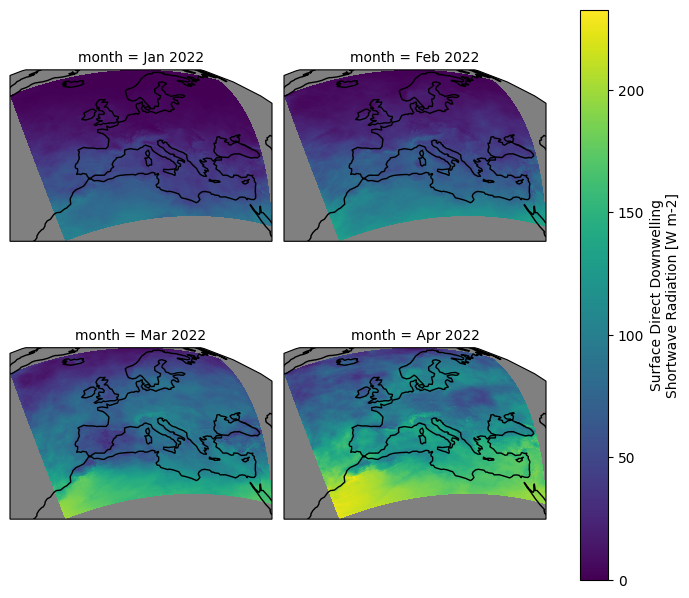

In [8]:
p=ds['rsdsdir'].isel(month=np.arange(4)).plot.pcolormesh(y='latitude', x='longitude', col='month',col_wrap=2,
       subplot_kws=dict(projection=ccrs.Orthographic(), facecolor="gray"),
       transform=ccrs.PlateCarree())
for ax in p.axs.flat:
    ax.coastlines()

# some statistics

## mean monthly direct radiation in the whole domain

In [ ]:
ds['rsdsdir'].mean(dim=['rlat','rlon']).plot(x='time');

In [ ]:
ds.latitude.min().values, ds.latitude.max().values

## split in latitude bins: mean direct monthly radiation

In [ ]:
ds['rsdsdir'].groupby_bins('latitude', bins=np.arange(20,75,10)).mean(dim=['rlat','rlon']).plot(x='time', hue='latitude_bins');